In [42]:
import pandas as pd
import glob
import os

import matplotlib.pyplot as mapyp
from matplotlib.lines import Line2D

import folium as fol
from folium import plugins

In [43]:
tabelas_vendas = []
tabelas_devolucao = []

caminhos = glob.glob(r"C:\Users\gabri\Desktop\Curso Básico de Python-20241204T190456Z-001\Vendas\*.csv")
caminhos_v = [k for k in caminhos if os.path.basename(k).startswith("Vendas")]

for caminho in caminhos_v:
    leitor = pd.read_csv(caminho)
    tabelas_vendas.append(leitor)

caminhos_d = [n for n in caminhos if os.path.basename(n).startswith("Devolucoes")]

for caminho1 in caminhos_d:
    leitor2 = pd.read_csv(caminho1)
    tabelas_devolucao.append(leitor2)

vendas = pd.concat(tabelas_vendas,ignore_index = False)
devolucoes = pd.concat(tabelas_devolucao,ignore_index = False)


In [44]:
print(vendas.head(40))

    Unnamed: 0     SKU     Produto  Quantidade Vendida Primeiro Nome  \
0           17  HL4379   Televisão                   2      Carolina   
1           25  HL4379   Televisão                   1        Danilo   
2           27  HL1918      iPhone                   5       Bernard   
3           54  HL1918      iPhone                   5         Lucas   
4           67  HL8851    Notebook                   5      Bernardo   
5          107  HL4379   Televisão                   2         Raíza   
6          117  HL8851    Notebook                   1         Paola   
7          155  HL8851    Notebook                   4        Marina   
8          189  HL8851    Notebook                   5       Giovana   
9          217  HL1918      iPhone                   5       Gabriel   
10         218  HL7348  SmartWatch                   1        Amanda   
11         220  HL1918      iPhone                   5      Isabella   
12         231  HL1918      iPhone                   5     Guilh

In [45]:
#Tratamento dos dados
df_vendas = pd.DataFrame(vendas)
df_devolucao = pd.DataFrame(devolucoes)

# Classificação da coluna Data na tabela vendas em ordem ascendente
df_vendas.sort_values(by = ['Data'])

#remoção da última coluna 
df_vendas1 = df_vendas.drop(df_vendas.columns[9], axis=1)

#Alteração do nome da coluna
df_vendas1 = df_vendas1.rename({'Unnamed: 0':'Id'}, axis = 1)

print(df_vendas1)

        Id     SKU     Produto  Quantidade Vendida Primeiro Nome   Sobrenome  \
0       17  HL4379   Televisão                   2      Carolina  Alfradique   
1       25  HL4379   Televisão                   1        Danilo       Rubim   
2       27  HL1918      iPhone                   5       Bernard     Pedrosa   
3       54  HL1918      iPhone                   5         Lucas       Lemos   
4       67  HL8851    Notebook                   5      Bernardo     Botelho   
...    ...     ...         ...                 ...           ...         ...   
2221  9981  HL7348  SmartWatch                   4          João      Junior   
2222  9984  HL1918      iPhone                   4          Itai      Puntel   
2223  9985  HL1918      iPhone                   1     Guilherme      Vianna   
2224  9991  HL7348  SmartWatch                   5       Antônio      Soares   
2225  9996  HL4379   Televisão                   5          Caio      Moraes   

            Data            Loja  Preco

In [46]:
#formatando a coluna data para datetime
df_vendas1['Data'] = pd.to_datetime(df_vendas1['Data'],format = '%m/%d/%Y')

In [47]:
#Leitura dos tipos de dados no dataframe df_vendas1
df_vendas1.dtypes

Id                             int64
SKU                           object
Produto                       object
Quantidade Vendida             int64
Primeiro Nome                 object
Sobrenome                     object
Data                  datetime64[ns]
Loja                          object
Preco Unitario                 int64
dtype: object

In [48]:
#leitura da base de dados df_devolucao
print(df_devolucao)

     Unnamed: 0     SKU     Produto  Quantidade Devolvida        Data  \
0             3  HL1148      Iphone                     3  10/31/2018   
1             6  HL7348  SmartWatch                     1    2/6/2018   
2            20  HL7348  SmartWatch                     3   10/5/2018   
3            21  HL1918     Android                     1   5/26/2018   
4            23  HL2714      Tablet                     1   4/24/2018   
..          ...     ...         ...                   ...         ...   
97          477  HL9654   Televisão                     5    4/5/2018   
98          478  HL6259    Notebook                     1  10/27/2018   
99          486  HL7348  SmartWatch                     5   4/13/2018   
100         487  HL2714      Tablet                     2    9/7/2018   
101         494  HL6259    Notebook                     4    6/1/2018   

               Loja  Preço Unitário  Unnamed: 6  
0    Belo Horizonte            5300         NaN  
1    Belo Horizonte    

In [49]:
#Tratamento dos dados em df_devolucao

df_devolucao = df_devolucao.drop(df_devolucao.columns[7], axis = 1)

df_devolucao1 = df_devolucao.rename({"Unnamed: 0": "Id", "Preço Unitário" : "Preco Unitario"},axis = 1)

df_devolucao1.sort_values(by = 'Data', ascending = True)

print(df_devolucao1.head(40))

     Id     SKU     Produto  Quantidade Devolvida        Data            Loja  \
0     3  HL1148      Iphone                     3  10/31/2018  Belo Horizonte   
1     6  HL7348  SmartWatch                     1    2/6/2018  Belo Horizonte   
2    20  HL7348  SmartWatch                     3   10/5/2018  Belo Horizonte   
3    21  HL1918     Android                     1   5/26/2018  Belo Horizonte   
4    23  HL2714      Tablet                     1   4/24/2018  Belo Horizonte   
5    24  HL9654   Televisão                     5  12/26/2018  Belo Horizonte   
6    41  HL7348  SmartWatch                     5  11/20/2018  Belo Horizonte   
7    48  HL2714      Tablet                     3   1/27/2018  Belo Horizonte   
8    54  HL9654   Televisão                     1    2/3/2018  Belo Horizonte   
9    74  HL1918     Android                     1   1/21/2018  Belo Horizonte   
10  106  HL6259    Notebook                     4   2/19/2018  Belo Horizonte   
11  109  HL9654   Televisão 

In [50]:
#Formatando a coluna data para Datetime64

df_devolucao1['Data'] = pd.to_datetime(df_devolucao1['Data'], format = '%m/%d/%Y')

In [51]:
tipos1 = df_devolucao1.dtypes
print(tipos1)

Id                               int64
SKU                             object
Produto                         object
Quantidade Devolvida             int64
Data                    datetime64[ns]
Loja                            object
Preco Unitario                   int64
dtype: object


In [52]:
# Verificação dos dados
chaves_comuns = df_vendas1['SKU'].isin(df_devolucao1['SKU']) & df_vendas1['Id'].isin(df_devolucao1['Id'])
quant = chaves_comuns.sum()

quant_coluna = df_vendas1['SKU'].count() + df_devolucao1['SKU'].count() + df_vendas1['Id'].count() + df_devolucao1['Id'].count()
print(f"a quantidade de chaves parecidas: {quant} em relacao ao total de coluna: {quant_coluna}")

a quantidade de chaves parecidas: 303 em relacao ao total de coluna: 20996


In [53]:
#Mesclagem de dois dataframes com todos os dados
geral = pd.merge(df_vendas1,df_devolucao1,on = ['SKU','Id','Preco Unitario'],how = 'outer')
display(geral)


,Id,SKU,Produto_x,Quantidade Vendida,Primeiro Nome,Sobrenome,Data_x,Loja_x,Preco Unitario,Produto_y,Quantidade Devolvida,Data_y,Loja_y
0,2,HL1148,Câmera,2.0,Camila,Sobral,2018-10-21,Fortaleza,2100,NaN,NaN,NaT,NaN
1,3,HL1148,NaN,NaN,NaN,NaN,NaT,NaN,5300,Iphone,3.0,2018-10-31,Belo Horizonte
2,9,HL1148,Câmera,3.0,Camille,Silva,2018-03-26,São Paulo,2100,NaN,NaN,NaT,NaN
3,19,HL1148,NaN,NaN,NaN,NaN,NaT,NaN,5300,Iphone,3.0,2018-08-16,Rio de Janeiro
4,30,HL1148,Câmera,4.0,Gabriel,Puntel,2018-09-27,São Paulo,2100,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10467,9909,HL9962,Android,1.0,Gabriel,Thoni,2018-04-07,São Paulo,3400,NaN,NaN,NaT,NaN
10468,9923,HL9962,Android,3.0,Daniel,Nauenberg,2018-05-02,Fortaleza,3400,NaN,NaN,NaT,NaN
10469,9970,HL9962,Android,1.0,Fernanda,Junior,2018-09-12,Salvador,3400,NaN,NaN,NaT,NaN
10470,9976,HL9962,Android,2.0,Andreza,Ramos,2018-12-17,Rio de Janeiro,3400,NaN,NaN,NaT,NaN


In [54]:
#Tratamento dos dados

geral = geral.rename(columns = {'Produto_x': 'Produto_vendido','Produto_y': 'Produto_devolvido','Data_x':'Data_venda' ,'Data_y':'Data_devolucao','Loja_x':'Loja_venda','Loja_y': 'Loja_devolucao'})
print(geral.head(50))

#Tratamento dos tipos de dados
print('\n Os tipos dos dados:')
tipos = geral.dtypes
display(tipos)

geral['Quantidade Vendida'] = pd.to_numeric(geral['Quantidade Vendida']).fillna(0).astype(int)

     Id     SKU Produto_vendido  Quantidade Vendida Primeiro Nome  Sobrenome  \
0     2  HL1148          Câmera                 2.0        Camila     Sobral   
1     3  HL1148             NaN                 NaN           NaN        NaN   
2     9  HL1148          Câmera                 3.0       Camille      Silva   
3    19  HL1148             NaN                 NaN           NaN        NaN   
4    30  HL1148          Câmera                 4.0       Gabriel     Puntel   
5    30  HL1148             NaN                 NaN           NaN        NaN   
6    34  HL1148          Câmera                 1.0        Rubens      Netto   
7    35  HL1148             NaN                 NaN           NaN        NaN   
8    40  HL1148          Câmera                 2.0       Gabriel    Almeida   
9    42  HL1148             NaN                 NaN           NaN        NaN   
10   43  HL1148          Câmera                 5.0        Paloma  Sperandei   
11   50  HL1148             NaN         

Id                               int64
SKU                             object
Produto_vendido                 object
Quantidade Vendida             float64
Primeiro Nome                   object
Sobrenome                       object
Data_venda              datetime64[ns]
Loja_venda                      object
Preco Unitario                   int64
Produto_devolvido               object
Quantidade Devolvida           float64
Data_devolucao          datetime64[ns]
Loja_devolucao                  object
dtype: object

In [73]:
#Tratamento de erros de tipo
print(geral['Produto_vendido'].dtype)
geral['Produto_vendido'] = geral['Produto_vendido'].astype(str)

#Substituir valores nan
geral_filtrado = geral.dropna(subset=['Produto_vendido', 'Quantidade Vendida', 'Faturamento'])

object


In [74]:
#Tipos de dados do dataframe geral
geral.dtypes

Id                               int64
SKU                             object
Produto_vendido                 object
Quantidade Vendida               int32
Primeiro Nome                   object
Sobrenome                       object
Data_venda              datetime64[ns]
Loja_venda                      object
Preco Unitario                   int64
Produto_devolvido               object
Quantidade Devolvida           float64
Data_devolucao          datetime64[ns]
Loja_devolucao                  object
Faturamento                      int64
dtype: object

In [75]:
#Modificações no dataframe para análise
geral['Faturamento'] = geral['Quantidade Vendida'] * geral['Preco Unitario']


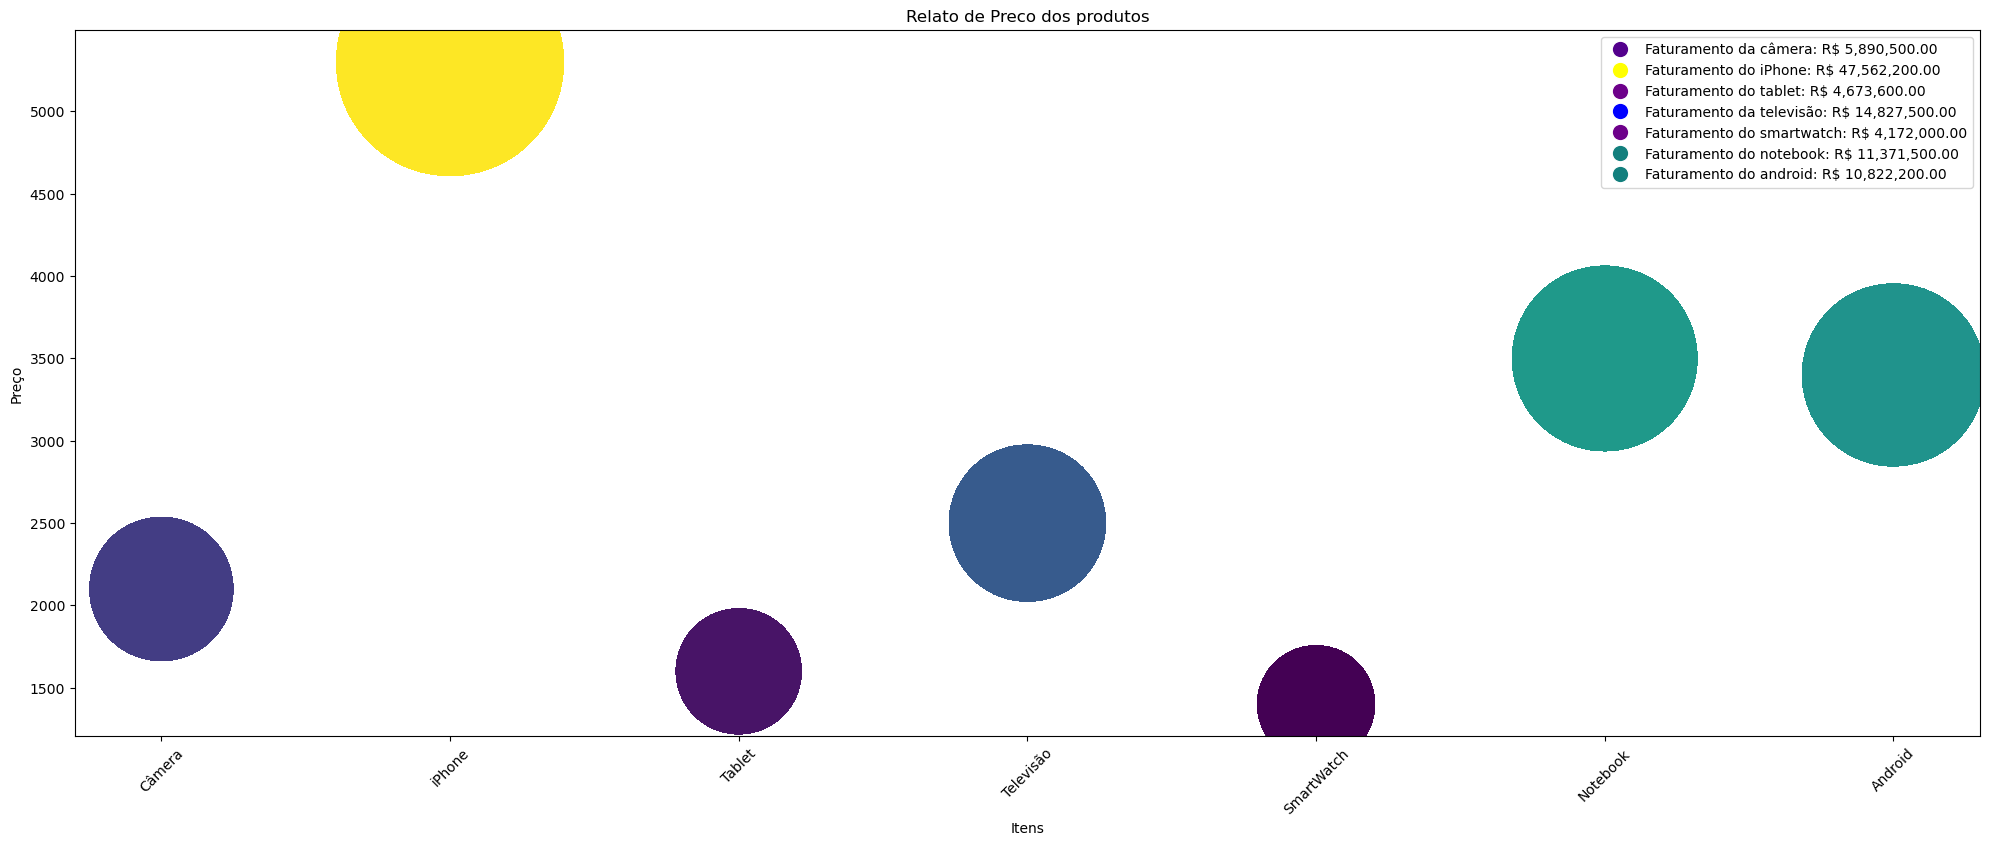

C:\Users\gabri\AppData\Local\Temp\ipykernel_5780\3053313574.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x['Faturamento'].sum() / x['Quantidade Vendida'].sum())


In [76]:
#Grafico de produto_vendido por preço_unitario

mapyp.figure(figsize = (20,8))
mapyp.scatter(geral['Produto_vendido'],geral['Preco Unitario'], s = geral['Quantidade Vendida'] * geral['Preco Unitario'], c = geral['Preco Unitario']
               , cmap = 'viridis',alpha = 0.9)
mapyp.title("Relato de Preco dos produtos")
mapyp.ylabel("Preço")
mapyp.xlabel("Itens")

#Valores de faturamento por produto
faturamento_iphone = geral.loc[geral['Produto_vendido'] == 'iPhone', 'Faturamento'].sum()
faturamento_televisao = geral.loc[geral['Produto_vendido'] == 'Televisão', 'Faturamento'].sum()
faturamento_câmera = geral.loc[geral['Produto_vendido'] == 'Câmera', 'Faturamento'].sum()
faturamento_android = geral.loc[geral['Produto_vendido'] == 'Android', 'Faturamento'].sum()
faturamento_notebook = geral.loc[geral['Produto_vendido'] == 'Notebook', 'Faturamento'].sum()
faturamento_smartwatch = geral.loc[geral['Produto_vendido'] == 'SmartWatch', 'Faturamento'].sum()
faturamento_tablet = geral.loc[geral['Produto_vendido'] == 'Tablet', 'Faturamento'].sum()

legenda = [ Line2D([0],[0], marker = 'o', color = 'w', label = f"Faturamento da câmera: R$ {faturamento_câmera:,.2f}", markerfacecolor = '#53008C', markersize = 12),
            Line2D([0],[0], marker = 'o', color = 'w', label = f"Faturamento do iPhone: R$ {faturamento_iphone:,.2f}", markerfacecolor = 'yellow', markersize = 12),
            Line2D([0],[0], marker = 'o', color = 'w', label = f"Faturamento do tablet: R$ {faturamento_tablet:,.2f}", markerfacecolor = '#6D008A', markersize = 12),
            Line2D([0],[0], marker = 'o', color = 'w', label = f"Faturamento da televisão: R$ {faturamento_televisao:,.2f}", markerfacecolor = 'blue', markersize = 12),
            Line2D([0],[0], marker = 'o', color = 'w', label = f"Faturamento do smartwatch: R$ {faturamento_smartwatch:,.2f}", markerfacecolor = '#6D008A', markersize = 12),
            Line2D([0],[0], marker = 'o', color = 'w', label = f"Faturamento do notebook: R$ {faturamento_notebook:,.2f}", markerfacecolor = '#127F7D', markersize = 12),
            Line2D([0],[0], marker = 'o', color = 'w', label = f"Faturamento do android: R$ {faturamento_android:,.2f}", markerfacecolor = '#127F7D', markersize = 12)]

mapyp.legend(handles = legenda, loc = 'upper right')
#Ajuste de proximidade dos pontos
mapyp.tight_layout() 

mapyp.xticks(rotation = 45)
mapyp.show()

#Gráfico de mapa com maior ticket medio por produto
print("\n")

# Filtrar valores inválidos
geral = geral[geral['Quantidade Vendida'] > 0]

# Calculando o ticket médio
tick_medio_df = (
    geral_filtrado.groupby('Loja_venda')
    .apply(lambda x: x['Faturamento'].sum() / x['Quantidade Vendida'].sum())
    .reset_index(name='tick_medio')
)

# Coordenadas para cidades
cidades_coordenada = {
    'Belo Horizonte': [-19.916681, -43.934493],
    'São Paulo': [-23.550520, -46.633308],
    'Recife': [-8.047562, -34.877000],
    'Rio de Janeiro': [-22.906847, -43.172897],
    'Fortaleza': [-3.717222, -38.543369],
    'Salvador': [-12.971399, -38.501392],
    'Porto Alegre': [-30.0346, -51.2177],
    'Goiás': [-16.6799, -50.1496],
    'Curitiba': [-25.4284, -49.2733]
}

# Inicializando o mapa
mapa = fol.Map(location=[-13.6707, -52.6349], zoom_start=5, control_scale=True)

# Adicionando círculos para cada cidade
for _, row in tick_medio_df.iterrows():
    cidade = row['Loja_venda']
    ticket = row['tick_medio']
    coordenadas = cidades_coordenada.get(cidade)

    if coordenadas:  # Verifica se as coordenadas existem
        # Adicionando marcador
        fol.Marker(
            coordenadas,
            popup=f"{cidade}: Ticket Médio R${ticket:.2f}"
        ).add_to(mapa)

        # Adicionando círculo proporcional ao ticket médio
        fol.Circle(
            location=coordenadas,
            radius=ticket * 30, 
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.4
        ).add_to(mapa)

# Exibindo o mapa
mapa
